MAE (Mean Absolute Error) : 시그마(|yi - y|) / n<br>
MSE (Mean Squared Error) : 시그마(yi - y)^2 / n

#### 1. 2차 다항식으로 변환, 선형회귀

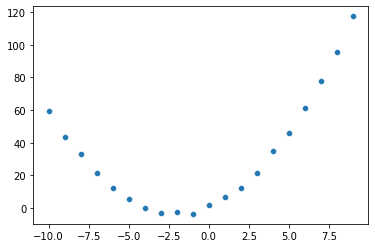

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# y = 1 + 4x + x**2

X = np.arange(-10,10)
y = 1 + 4*X + X**2 + np.random.randn(20)

sns.scatterplot(x = X, y = y); 

In [3]:
X

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [7]:
poly_ftr = PolynomialFeatures(degree = 2).fit_transform(X.reshape(-1, 1))

lr = LinearRegression()
lr.fit(poly_ftr, y)

print(lr.coef_.round(2))
print(lr.intercept_.round(2))

[0.   4.04 0.99]
1.01


In [ ]:
편향-분산 트레이드 오프
선형 회귀에서 실제 값과 예측 곡선을 비교하여 과대/과소 적합 여부를 판단할 수 있는 특징
편향성과 분산성은 상호 보완적 관계이다

편향성 : 데이터 값이 한쪽으로 치우쳐져 있는 것
분산성 : 데이터 값이 여러 방향으로 흩어져 있는 것

단순 모델 일수록(직선에 가까운) 고편향 저분산 --> 과소적합
복잡 모델 일수록(차수가 높은) 저편향 고분산 --> 과대적합

### (6) 로지스틱 회귀
http://naver.me/Ge5gsvEB

### (8) 회귀 실습 - 자전거 대여 수요 예측

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
bike = pd.read_csv("train.csv")

print(bike.shape)
bike.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [45]:
#datetime 칼럼의 데이터 형태를 datetime 으로 변경
bike['datetime'] = pd.to_datetime(bike['datetime'])
#bike['datetime'].astype('datetime64')

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [18]:
bike['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [ ]:
#datetime 을 나누어 새로운 칼럼 생성
#방법1
bike['year'] = bike['datetime'].astype('str').str.slice(0,4)
bike['month'] = bike['datetime'].astype('str').str.slice(5,7)
bike['day'] = bike['datetime'].astype('str').str.slice(8,10)
bike['hour'] = bike['datetime'].astype('str').str.slice(11,13)

In [ ]:
#방법2
bike['year'] = bike['datetime'].dt.strftime('%Y')
bike['month'] = bike['datetime'].dt.strftime('%m')
bike['day'] = bike['datetime'].dt.strftime('%d')
bike['hour'] = bike['datetime'].dt.strftime('%H')

In [46]:
#방법3
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour

In [ ]:
#방법4
bike['year'] = bike['datetime'].map(lambda x: x.strftime('%Y'))
bike['month'] = bike['datetime'].map(lambda x: x.strftime('%m'))
bike['day'] = bike['datetime'].map(lambda x: x.strftime('%d'))
bike['hour'] = bike['datetime'].map(lambda x: x.strftime('%H'))

In [ ]:
#방법5
bike['year'] = bike['datetime'].apply(lambda x: x.year)
bike['month'] = bike['datetime'].map(lambda x: x.month)
bike['day'] = bike['datetime'].map(lambda x: x.day)
bike['hour'] = bike['datetime'].map(lambda x: x.hour)

In [33]:
bike[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [47]:
#'datetime', 'casual', 'registered' 칼럼 지우기
bike.drop(['datetime', 'casual', 'registered'], axis = 1, inplace = True)
bike[:3]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2


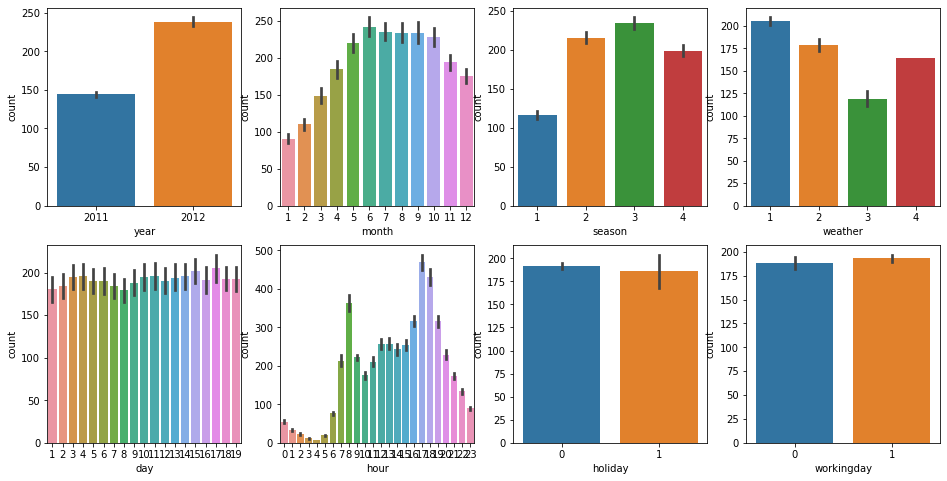

In [48]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)

cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']

# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4

    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='count', data=bike, ax=axs[row][col]) 

### * 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [53]:
y_target = bike['count']
X_features = bike.drop('count', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                   test_size = 0.3, random_state = 0)

#LinearRegression 으로 예측
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print("mae:", mae)
print("mse:", mse)
print("rmse:", rmse)

mae: 105.92444835101158
mse: 19852.69408784178
rmse: 140.89958867165575


In [54]:
y_test.describe()

count    3266.000000
mean      194.430496
std       180.235458
min         1.000000
25%        43.000000
50%       153.000000
75%       285.750000
max       901.000000
Name: count, dtype: float64

In [59]:
#y_test와 pred를 로그 변환해서 mse() 구하기
mean_squared_error(np.log1p(y_test), np.log1p(pred))

C:\Users\admin\AppData\Local\Temp\ipykernel_6320\3186471562.py:2: RuntimeWarning: invalid value encountered in log1p
  mean_squared_error(np.log1p(y_test), np.log1p(pred))


ValueError: Input contains NaN.

In [60]:
np.mean((np.log1p(y_test) - np.log1p(pred)) ** 2)

C:\Users\admin\AppData\Local\Temp\ipykernel_6320\397941796.py:1: RuntimeWarning: invalid value encountered in log1p
  np.mean((np.log1p(y_test) - np.log1p(pred)) ** 2)


1.356441356395335

In [61]:
import pydataset

In [62]:
mpg = pydataset.data("mpg")
mpg[:3]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [63]:
#제조사별 도시연비의 평균
mpg.groupby('manufacturer')[['cty']].mean()

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [71]:
#제조사별 도시연비의 최대값과 최소값의 차이
mpg.groupby('manufacturer')[['cty']].max()
mpg.groupby('manufacturer')[['cty']].min()

mpg.groupby('manufacturer')[['cty']].apply(lambda x: x.max() - x.min())

,cty
manufacturer,
audi,6
chevrolet,11
dodge,9
ford,7
honda,7
hyundai,5
jeep,8
land rover,1
lincoln,1


In [75]:
#제조사별 cty의 최대값, hwy의 최소값
mpg.groupby('manufacturer')[['hwy']].min()
mpg.groupby('manufacturer')[['cty', 'hwy']].agg({'cty' : 'max', 'hwy' : 'min'})
mpg.groupby('manufacturer')[['cty', 'hwy']].agg(cty_max = ('cty', 'max'), hwy_min = ('hwy', 'min'))

,cty_max,hwy_min
manufacturer,,
audi,21,23
chevrolet,22,14
dodge,18,12
ford,18,15
honda,28,29
hyundai,21,24
jeep,17,12
land rover,12,15
lincoln,12,16


<AxesSubplot:xlabel='manufacturer'>

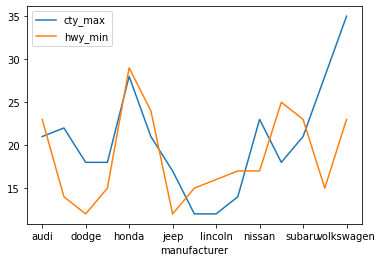

In [76]:
df = mpg.groupby('manufacturer')[['cty', 'hwy']].agg(cty_max = ('cty', 'max'), hwy_min = ('hwy', 'min'))
df.plot()

## 6. 차원 축소 Dimension Reduction

### (1) PCA (Principal Component Analysis)
참고<br>
https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/<br>
https://freshrimpsushi.github.io/

In [77]:
from sklearn.datasets import load_iris
#import panas as pd
#import matplotlib.pyplot as plt

In [81]:
iris = load_iris()

X = features = iris.data
y = labels = iris.target

In [82]:
X    #한 리스트 내에 4개의 성분 -> 4차원 구조 이다

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [83]:
#스케일링 (표준화)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [84]:
from sklearn.decomposition import PCA

#4차원 -> 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [86]:
#전체 변동성에서 개별 PCA Component 별로 차지하는 변동성 비율
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state = 156)

#원본 데이터
scores = cross_val_score(rcf, X, y, scoring = 'accuracy', cv=3)

#PCA 적용 데이터
pca_scores = cross_val_score(rcf, X_pca, y, scoring = 'accuracy', cv=3)

print("원본 데이터 교차 검증 개별 정확도:", scores)
print("원본 데이터 평균 정확도:", np.mean(scores))
print()
print("PCA 변환 데이터 교차 검증 개별 정확도:", pca_scores)
print("PCA 변환 데이터 평균 정확도:", np.mean(pca_scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


#### * 예제 : Credit Card Cliencts Dataset<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

In [118]:
df = pd.read_excel("default of credit card clients.xls",
                  header = 1, sheet_name = 'Data').iloc[0:,1:]
df[:3]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [119]:
df.shape

(30000, 24)

In [120]:
df.rename(columns = {'PAY_0' : 'PAY_1', 'default payment next month' : 'default'}, inplace = True)
y_target = df['default']
X_features = df.drop('default', axis = 1)

In [121]:
#corr() : 각 속성 간의 상관도
X_features.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


In [122]:
df.iloc[:, 11:17]
X_features_6 = df.iloc[:, 11:17]
X_features_6.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [123]:
#1. scaling
std = StandardScaler()
scaled = std.fit_transform(X_features_6)
scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]])

In [124]:
#2. PCA 변환
pca = PCA(n_components=2)
pcaed = pca.fit_transform(scaled)
pcaed

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       ...,
       [-1.19551872, -0.3595072 ],
       [-0.00829343, -0.04995798],
       [-0.25828552,  0.26525237]])

In [128]:
#3. LogistincRegression 으로 분류 (cv=5)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#PCA 적용 데이터
pca_scores = cross_val_score(lr, pcaed, y_target, scoring = 'accuracy', cv=5)

#원본 데이터
scores = cross_val_score(lr, X_features, y_target, scoring = 'accuracy', cv=5)

print("원본 데이터 교차 검증 개별 정확도:", scores.round(4))
print("원본 데이터 평균 정확도:", np.mean(scores).round(4))
print()
print("PCA 변환 데이터 교차 검증 개별 정확도:", pca_scores.round(4))
print("PCA 변환 데이터 평균 정확도:", np.mean(pca_scores).round(4))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

원본 데이터 교차 검증 개별 정확도: [0.7787 0.7788 0.7788 0.7788 0.7783]
원본 데이터 평균 정확도: 0.7787

PCA 변환 데이터 교차 검증 개별 정확도: [0.7787 0.7788 0.7788 0.7788 0.7788]
PCA 변환 데이터 평균 정확도: 0.7788


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [130]:
cancer = load_breast_cancer()

In [131]:
#데이터 스케일링(표준화)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

std = StandardScaler()
cancer_std = std.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(cancer_std, cancer.target,
                                                    test_size = 0.3, random_state = 0)

In [135]:
#로지스틱 회귀를 이용해 학습 & 예측 (solver = 'lbfgs')
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

#accuracy와 ROC 측정
acc = accuracy_score(y_test, lr_preds)
roc_auc = roc_auc_score(y_test, lr_preds)

print('acc:', acc.round(4))
print('roc_auc:', roc_auc.round(4))

acc: 0.9766
roc_auc: 0.9716


In [141]:
#다른 solver 값으로 로지스틱 회귀 (max_iter = 600)
#max_iter : solver로 지정된 최적화 알고리즘이 최적 수렴할 수 있는 최대 반복 횟수

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr = LogisticRegression(solver = solver, max_iter = 600)
    lr.fit(X_train, y_train)
    lr_preds = lr.predict(X_test)
    
    acc = accuracy_score(y_test, lr_preds)
    roc_auc = roc_auc_score(y_test, lr_preds)

    print(solver)
    print('acc:', acc.round(4), ',', 'roc_auc:', roc_auc.round(4))
    print()

lbfgs
acc: 0.9766 , roc_auc: 0.9716

liblinear
acc: 0.9825 , roc_auc: 0.9795

newton-cg
acc: 0.9766 , roc_auc: 0.9716

sag
acc: 0.9825 , roc_auc: 0.9795

saga
acc: 0.9825 , roc_auc: 0.9795

